In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
data = pd.read_csv("c:\\mnist_train.csv",  header = None)
data.shape

(60000, 785)

In [5]:
numTrain =  int(0.7 * data.shape[0])
print (numTrain)

42000


In [6]:
np.random.seed(123)

In [7]:
np.random.shuffle(data.values)

In [8]:
trainData = data[:numTrain]
testData = data[numTrain:]

print (trainData.shape)
print (testData.shape)

(42000, 785)
(18000, 785)


In [9]:
trainData.loc[:, 0].value_counts()

1    4699
7    4420
3    4297
9    4196
6    4156
4    4133
0    4124
2    4100
8    4076
5    3799
Name: 0, dtype: int64

In [10]:
trainX = trainData.loc[:, 1:].values
trainY = trainData.loc[:, 0].values

In [11]:
testX = testData.loc[:, 1:].values
testY = testData.loc[:, 0].values
trainY

array([4, 9, 8, ..., 1, 3, 3], dtype=int64)

In [12]:
x_train = trainX.reshape(trainX.shape[0], 28, 28, 1)
x_test = testX.reshape(testX.shape[0], 28, 28, 1)

In [13]:
from tensorflow.python.keras.utils.np_utils import to_categorical
num_classes = 10
y_train = to_categorical(trainY, num_classes)
y_test = to_categorical(testY, num_classes)
trainY[0]

4

In [14]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train_shape: (42000, 28, 28, 1)

x_train shape: (42000, 28, 28, 1)
42000 train samples
18000 test samples


In [17]:
batch_size = 128

In [18]:
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='rmsprop',metrics=['accuracy'])

In [19]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
329/329 [==============================] - 464s 1s/step - loss: 0.2534 - accuracy: 0.9212 - val_loss: 0.0748 - val_accuracy: 0.9762
Epoch 2/10
329/329 [==============================] - 422s 1s/step - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0518 - val_accuracy: 0.9839
Epoch 3/10
329/329 [==============================] - 391s 1s/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 4/10
329/329 [==============================] - 441s 1s/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0360 - val_accuracy: 0.9888
Epoch 5/10
329/329 [==============================] - 521s 2s/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 6/10
329/329 [==============================] - 456s 1s/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 7/10
329/329 [==============================] - 465s 1s/step - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9899

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034356240183115005
Test accuracy: 0.9900000095367432


In [21]:
testX = testData.loc[:, 1:].values
testX.shape

(18000, 784)

In [22]:
result = model.predict(x_test[0].reshape(1,28,28,1))
result

1/1 [==============================] - 20s 20s/step


array([[9.9998617e-01, 4.0770662e-08, 2.1214134e-07, 1.1090936e-09,
        4.0387038e-10, 4.1773465e-10, 1.3329371e-05, 2.9291940e-08,
        1.0976545e-07, 9.3191872e-09]], dtype=float32)

In [23]:
np.argmax(result)

0

In [24]:
sampleRow = testData.loc[42000, 1:].values
np.shape(sampleRow)
imageData = sampleRow.reshape(28, 28)
print (sampleRow.shape)

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
print ("Label: ", testData.loc[42000, 0])

(784,)


Matplotlib is building the font cache; this may take a moment.


Label:  0


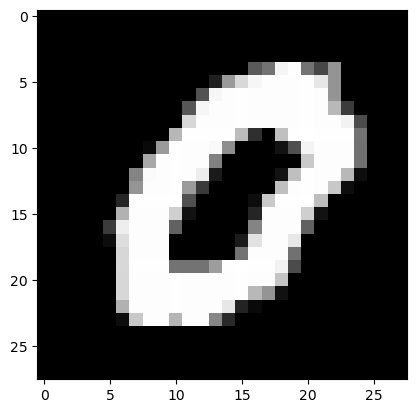

In [25]:
imshow(imageData, cmap='Greys_r', 
       interpolation='None')